In [3]:
import numpy as np
import pandas as pd 
from xgboost import XGBRegressor 
from sklearn.model_selection import TimeSeriesSplit
import warnings                                  
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 9]
from sklearn.preprocessing import StandardScaler
from itertools import product                   
from sklearn.model_selection import cross_val_score
from scipy.optimize import minimize         
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
warnings.filterwarnings('ignore')

In [4]:
train = pd.read_csv("ts_train.csv")
test = pd.read_csv("ts_test.csv")

In [5]:
def select_ts(index):
    return (train[train.tsID == index].copy(),
            test[test.tsID == index].copy())
train1, test1 = select_ts(1)

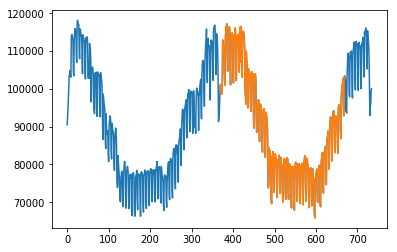

In [6]:
plt.plot(train1.ACTUAL)
x = 369
ypred1 = np.array(train1.ACTUAL[x:x+300])
plt.plot(train1.ACTUAL[x:x+300])

In [7]:
df_main = pd.Series(ypred1, index = test1.ID)

In [8]:
def selector(i, x = 369, trend = 0, sc = 1):
    trend = 0
    sc = 1
    train2, test2 = select_ts(i)
    n = len(test2)
    ypred2 = (np.array(train2.ACTUAL[x:x+n]) + trend)*sc
    df_maini = (pd.Series(ypred2, index = test2.ID))
    plt.plot(train2.ACTUAL)
    plt.plot((train2.ACTUAL[x:x+300] + trend)*sc)
    return df_maini
def selector2(i, x = 150, trend = 0,  sc = 1):
    trend = 0
    sc = 1
    train12, test12 = select_ts(i)
    n = len(test12)
    ypred12 = (np.array(train12.ACTUAL[x:x+n]) + trend)*sc 
    df_maini = pd.Series(ypred12, index = test12.ID)
    plt.plot(train12.ACTUAL)
    plt.plot((train12.ACTUAL[x:x+300]  + trend)*sc)
    return df_maini

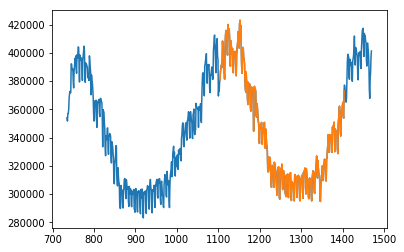

In [9]:
df_main = df_main.append(selector(2, 369))

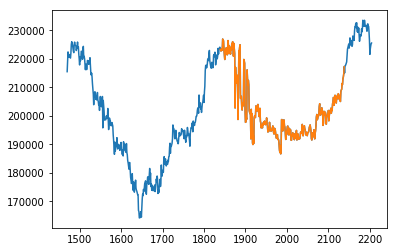

In [10]:
df_main = df_main.append(selector(3))

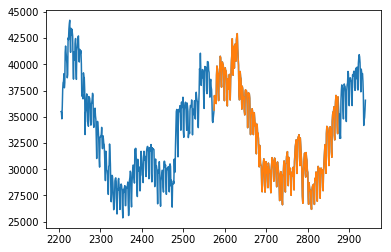

In [11]:
df_main = df_main.append(selector(4))

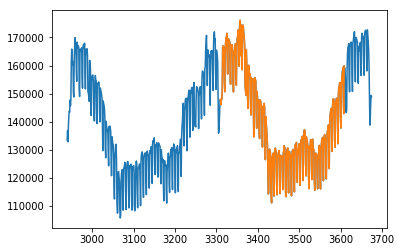

In [12]:
df_main = df_main.append(selector(5))

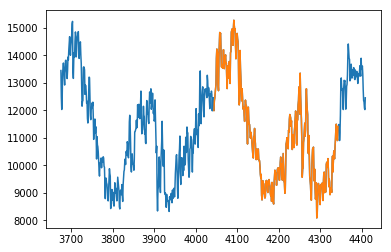

In [13]:
df_main = df_main.append(selector(6))

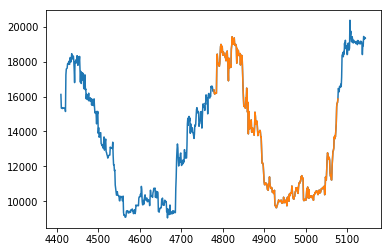

In [14]:
df_main = df_main.append(selector(7))

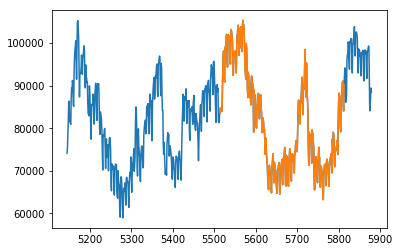

In [15]:
df_main = df_main.append(selector(8))

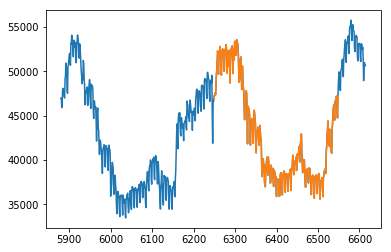

In [16]:
df_main = df_main.append(selector(9))

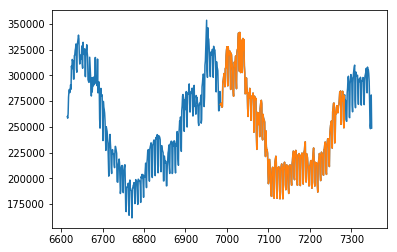

In [17]:
df_main = df_main.append(selector(10))

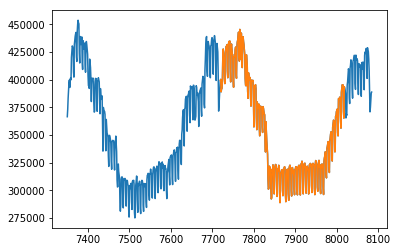

In [18]:
df_main = df_main.append(selector(11))

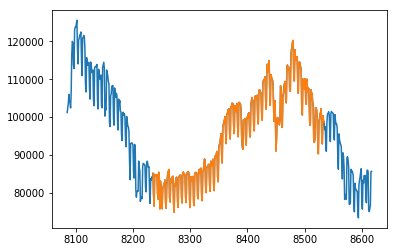

In [19]:
df_main = df_main.append(selector2(12))

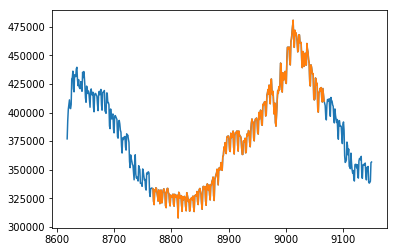

In [20]:
df_main = df_main.append(selector2(13))

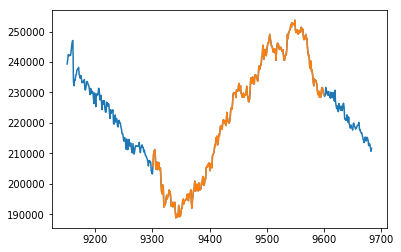

In [21]:
df_main = df_main.append(selector2(14))

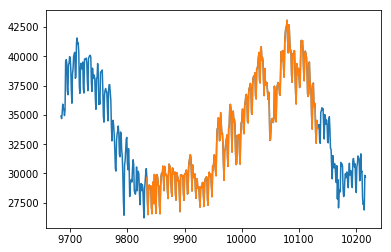

In [22]:
df_main = df_main.append(selector2(15))

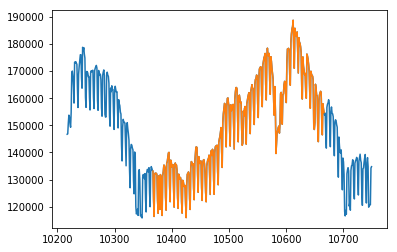

In [23]:
df_main = df_main.append(selector2(16))

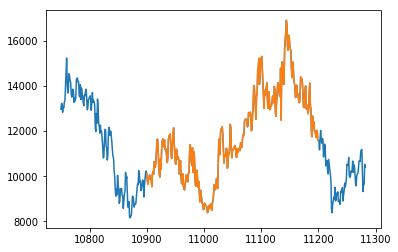

In [24]:
df_main = df_main.append(selector2(17))

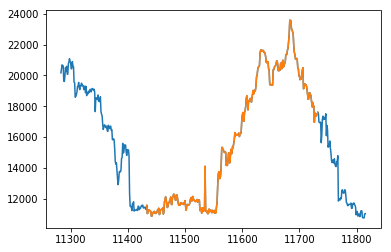

In [25]:
df_main = df_main.append(selector2(18))

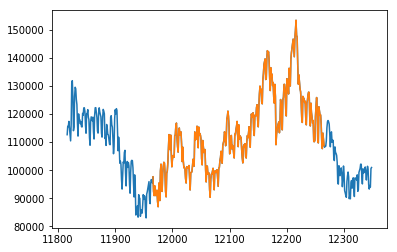

In [26]:
df_main = df_main.append(selector2(19))

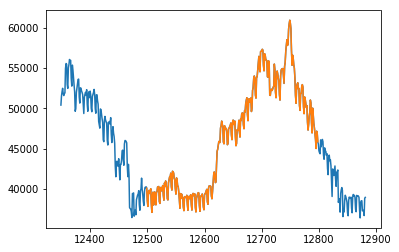

In [27]:
df_main = df_main.append(selector2(20))

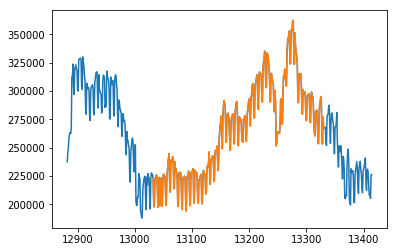

In [28]:
df_main = df_main.append(selector2(21))

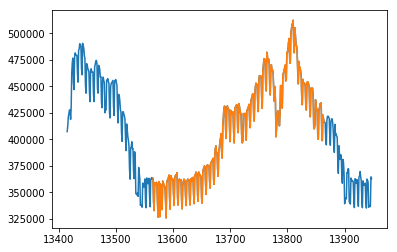

In [29]:
df_main = df_main.append(selector2(22))

In [30]:
df_main

ID
16407    100633.0
16408    101135.0
16409     98646.0
16410     98680.0
16411     98665.0
16412    101061.0
16413    112928.0
16414    111935.0
16415    111050.0
16416    111515.0
16417    104635.0
16418    100909.0
16419    110962.0
16420    114157.0
16421    116295.0
16422    116554.0
16423    117226.0
16424    108987.0
16425    104660.0
16426    115786.0
16427    115727.0
16428    115988.0
16429    116418.0
16430    116033.0
16431    106775.0
16432    101057.0
16433    112227.0
16434    114022.0
16435    114716.0
16436    114758.0
           ...   
7776     453028.0
7777     454078.0
7778     451718.0
7779     449893.0
7780     428748.0
7781     421207.0
7782     448256.0
7783     447765.0
7784     447940.0
7785     448239.0
7786     438729.0
7787     410652.0
7788     409863.0
7789     413751.0
7790     437339.0
7791     433837.0
7792     426835.0
7793     428207.0
7794     403260.0
7795     399952.0
7796     427810.0
7797     429394.0
7798     433297.0
7799     434065.0
7800   

In [32]:
df_main.to_csv("helper.csv")